# Titanic Survived Project--Predicting survival

### By:      AFSANA BEGAM
### Batch: DS2303


__________________________________________________________________________________________________________________________

### ***Problem Statement:***
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

### **Importing Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Data Collection & Processing:**

In [ ]:
!git clone https://github.com/dsrscientist/dataset1.git

In [3]:
# Loading the dataset to Pandas DataFrame
dataset = pd.read_csv('/content/dataset1/titanic_train.csv')

In [4]:
# Number of Rows and Columns
dataset.shape

(891, 12)

Observation :
* This Titanic Dataset contains 891 rows & 12 columns.
* Here our objective is to predict survival using classification algorithim for that Here our target variable is 'Survived'.
* We have 5 features with object datatypes & rest are with numerical features.

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking the number of missing values in each columns
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling the Missing Values:**

In [8]:
# Dropping the 'Cabin' Column 
dataset = dataset.drop(columns= 'Cabin', axis=1)

In [9]:
# Replacing the missing values in 'Age' column with mean value
dataset['Age'].fillna(dataset['Age'].mean(), inplace= True)

In [10]:
# Finding the mode value of 'Embarked' column
print(dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(dataset['Embarked'].mode()[0])

S


In [12]:
# Replacing the missing values in 'Embarked' column with mean value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace= True)

In [13]:
# Checking the number of missing values in each column
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **Data Analysis:**

In [14]:
#Statistical measures of the data
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Correlation:**

In [15]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


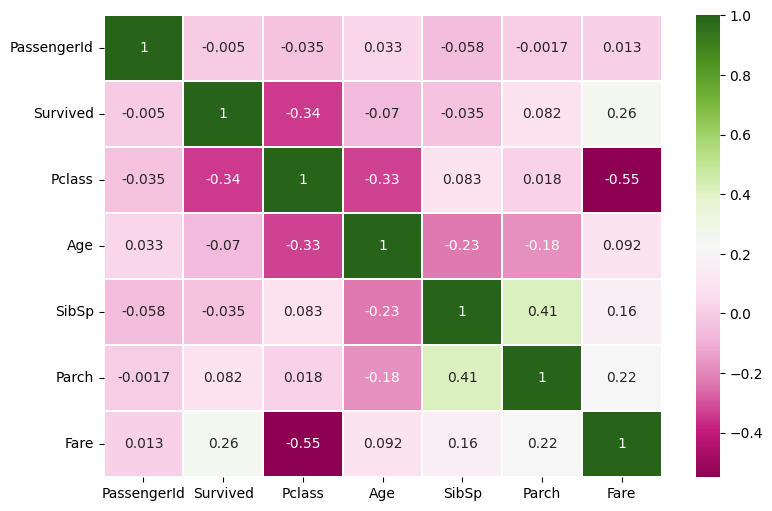

In [16]:
plt.figure(figsize=(9,6))
sns.heatmap(dataset.corr(), annot= True, cmap='PiYG',linewidths=0.3)
plt.show()

***Correlation with Target Variables Survived--***

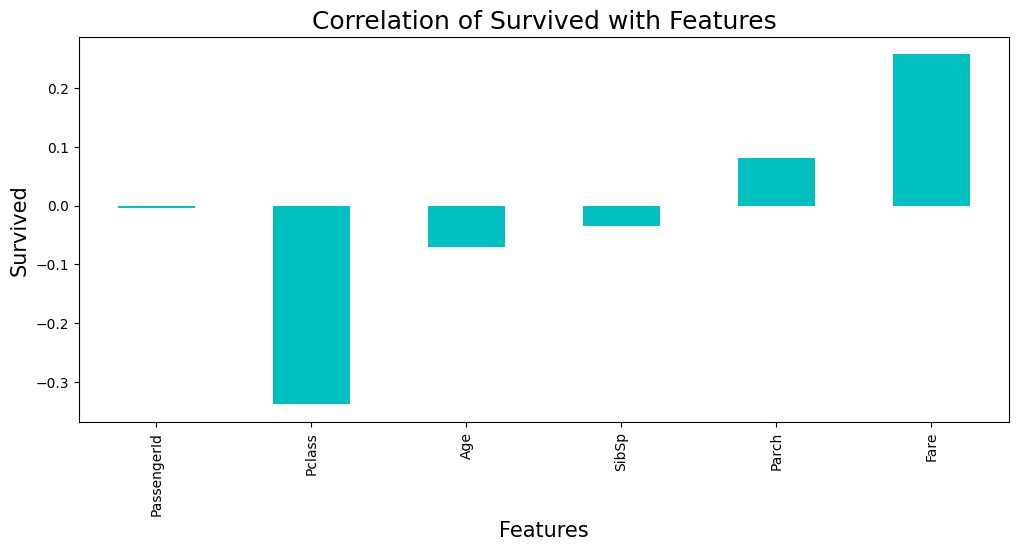

In [17]:
plt.figure(figsize = (12,5))
dataset.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

In [18]:
#Number of people Survived and Not Survived
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**DATA VISUALIZATION:**

In [19]:
sns.set()

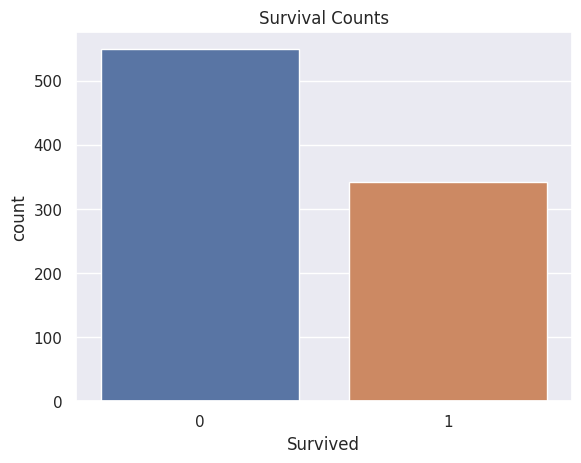

In [20]:
# making a count plot for 'Survived' column
sns.countplot(x='Survived', data=dataset)
plt.title('Survival Counts')
plt.show()

In [21]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

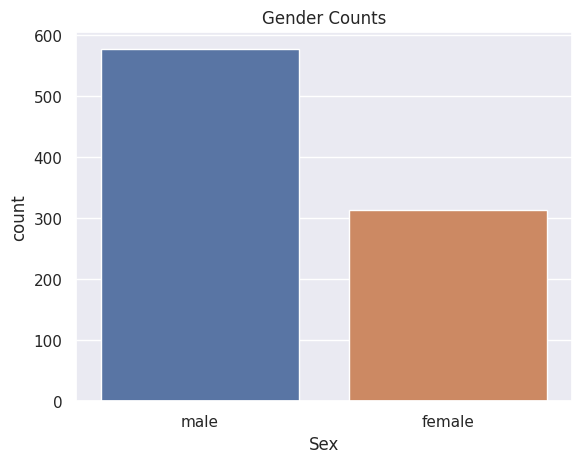

In [22]:
# making count plot for 'Sex' column
sns.countplot(x= 'Sex', data= dataset)
plt.title('Gender Counts')
plt.show()

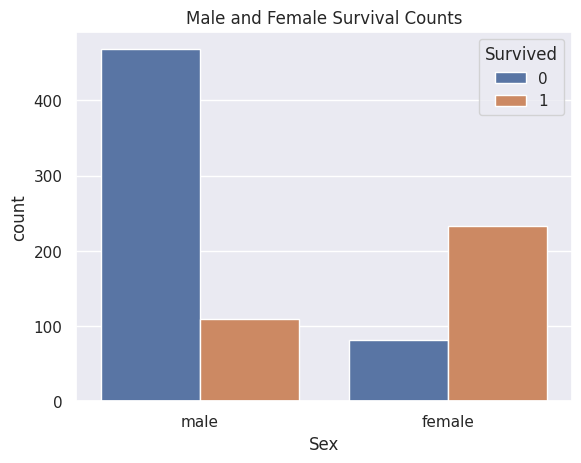

In [23]:
# Number of survivors gender wise
sns.countplot(data= dataset,x= 'Sex', hue= 'Survived')
plt.title('Male and Female Survival Counts')
plt.show()

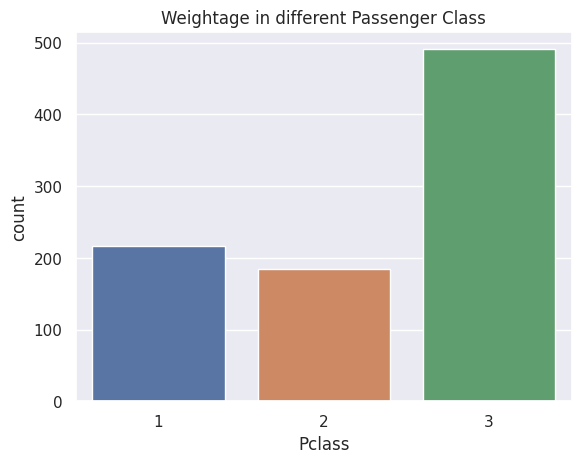

In [24]:
# making a count plot for 'Pclass' column
sns.countplot(data= dataset,x= 'Pclass')
plt.title('Weightage in different Passenger Class')
plt.show()

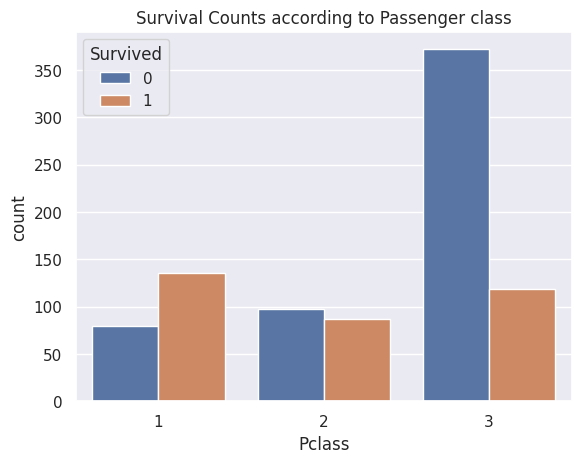

In [25]:
sns.countplot(data= dataset,x= 'Pclass', hue= 'Survived')
plt.title('Survival Counts according to Passenger class')
plt.show()

**Encoding the Categorical columns:**

In [26]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# Converting categorical values into Numerical values
dataset.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':1,'C':2,'Q':3}},inplace = True)

In [29]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


**Separating Features and Target:**

In [30]:
X= dataset.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Survived'],axis=1)
y= dataset['Survived']

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,1
888,3,1,29.699118,1,2,23.4500,1
889,1,0,26.000000,0,0,30.0000,2


In [32]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Splitting the data into Training and Testing data:**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [34]:
X.shape, X_train.shape, X_test.shape

((891, 7), (712, 7), (179, 7))

## **Model Training: Logistic Regression model**

In [35]:
model= LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
X_train_Prediction= model.predict(X_train)

In [38]:
training_data_accuracy = accuracy_score(y_train, X_train_Prediction)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8103932584269663


In [39]:
X_test_Prediction= model.predict(X_test)

In [40]:
testing_data_accuracy = accuracy_score(y_test, X_test_Prediction)
print('Accuracy score of testing data:', testing_data_accuracy)

Accuracy score of testing data: 0.7821229050279329


**Saving the Model:**

In [42]:
import joblib
joblib.dump(model,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

### **Building a PREDICTIVE SYSTEM:**

In [43]:
input_data = (1,1,38.000000,1,0,71.2833,2)
#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as we arepredicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction==1):
  print('SURVIVED')
else:
  print('NOT SURVIVED')

[1]
SURVIVED
